In [2]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image
import time
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.models import model_from_json

In [3]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))
from keras.models import model_from_json
model.load_weights('/content/drive/MyDrive/Colab Notebooks/images/saved_file/vgg_face_weights.h5')
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img) 
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img
def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img
def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

FACE RECOGNITION

Cosine similarity:  -1.1920928955078125e-07
Euclidean distance:  0.0
verified... they are same person
Same Person
Darsh1.jpg
After removal ['Darsh1']
['Darsh1']


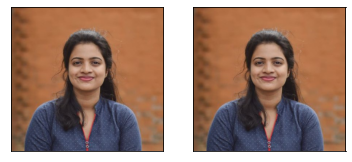

-----------------------------------------
['Darsh1']


In [5]:
from PIL import Image  
import PIL 
import matplotlib
import pandas as pd
from datetime import datetime
import cv2
epsilon = 0.4
# import xlsxwriter
present_students=[]
 
def verifyFace(img1, img2):
    img1_representation = vgg_face_descriptor.predict(preprocess_image('/content/drive/MyDrive/Colab Notebooks/images/face1/%s' % (img1)))[0,:]
    img2_representation = vgg_face_descriptor.predict(preprocess_image('/content/drive/MyDrive/Colab Notebooks/images/face2/%s' % (img2)))[0,:]
    # cv2_imshow(img2)
    # cv2.waitKey(0)
    cosine_similarity = findCosineSimilarity(img1_representation, img2_representation)
    euclidean_distance = findEuclideanDistance(img1_representation, img2_representation)
    
    print("Cosine similarity: ",cosine_similarity)
    print("Euclidean distance: ",euclidean_distance)
    if (cosine_similarity < epsilon):
        print("verified... they are same person")
        print("Same Person")
        print(img2)   
        names = img2.split('.')
        names.remove('jpg')
        print("After removal",names)      
        for name in names:
            present_students.append(name)
        
        
 
    else:
        print("unverified! they are not same person!")
       
        s=image.load_img('/content/drive/My Drive/Colab Notebooks/images/face1/%s' % (img1))
        
        
    print(present_students)
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(image.load_img('/content/drive/My Drive/Colab Notebooks/images/face1/%s' % (img1)))
    plt.xticks([]); plt.yticks([])
    f.add_subplot(1,2, 2)
    plt.imshow(image.load_img('/content/drive/My Drive/Colab Notebooks/images/face2/%s' % (img2)))
    plt.xticks([]); plt.yticks([])
    plt.show(block=True)
    print("-----------------------------------------")
import os
# df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/attendence/Student_Attendance.xlsx')
path1 = '/content/drive/My Drive/Colab Notebooks/images/face1'
path2  = '/content/drive/My Drive/Colab Notebooks/images/face2'
for root, dir, files1 in os.walk(path1):
  for root, dir, files2 in os.walk(path2):
    for name1 in files1:
      for name2 in files2:
         verifyFace(name1,name2)
 
print(present_students)